<a href="https://colab.research.google.com/github/shreythapar/ML_Dataset/blob/main/E049_ML_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Shrey Thapar**
# **E049**

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/shreythapar/ML_Dataset/main/Mall_Customers.csv'
df2 = pd.read_csv(url)


# Checking if data is clean 

In [ ]:
df2.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Displaying the data

In [ ]:
df2

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Scatter Plot

In [ ]:
A = df2['Annual Income (k$)']
B = df2['CustomerID']
Y=df2['Spending Score (1-100)']

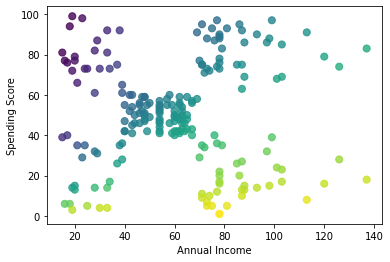

In [ ]:
plt.scatter(A,Y, c=np.arctan2(A, Y), s=50, alpha=0.8)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

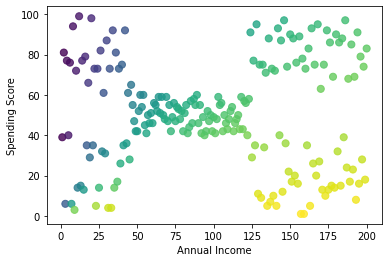

In [ ]:
plt.scatter(B,Y, c=np.arctan2(B, Y), s=50, alpha=0.8)
plt.xlabel('Customer ID')
plt.ylabel('Spending Score')
plt.show()

## Histograms

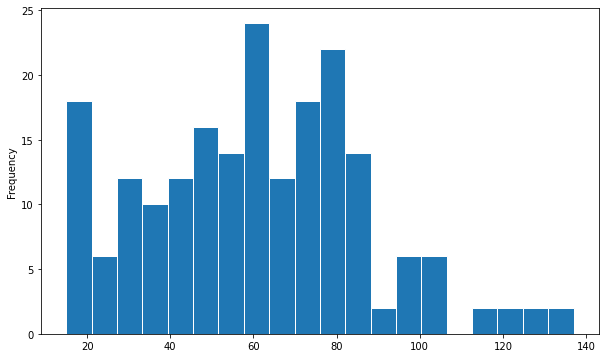

In [ ]:
(df2['Annual Income (k$)']).plot.hist(bins =20, figsize = (10,6), edgecolor = 'white')

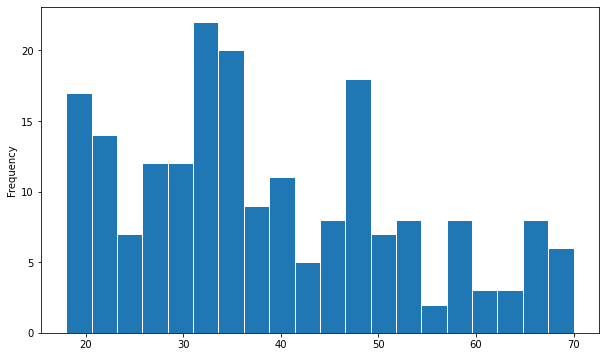

In [ ]:
(df2['Age']).plot.hist(bins =20, figsize = (10,6), edgecolor = 'white')

## Box Plot

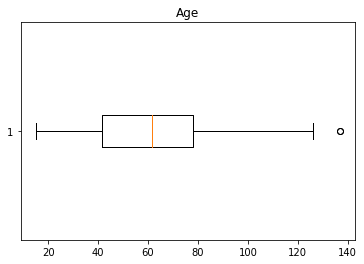

In [ ]:
z = df2.iloc[:, 3]
box_1 = plt.boxplot(z, vert=False, showcaps=True, showfliers=True)
plt.title("Age")
plt.show(box_1)

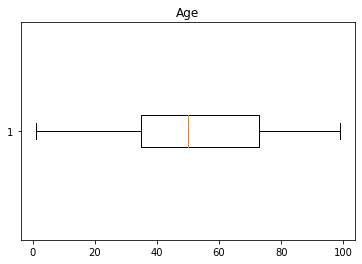

In [ ]:
y = df2.iloc[:, -1]
box_1 = plt.boxplot(y, vert=False, showcaps=True, showfliers=True)
plt.title("Age")
plt.show(box_1)

## K-MEANS CLUSTERING

In [ ]:
from sklearn.cluster import KMeans
%matplotlib inline
x = df2.iloc[:, [3,4]].values
mc=[]
for i in range(1,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

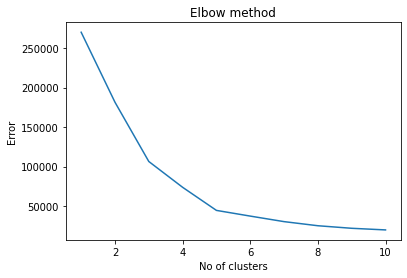

In [ ]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
# TRAINING MODEL ON DATASET
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
# dependent variable based on training 
X = df2.iloc[:, [2, 3]].values
y_kmeans = kmeans.fit_predict(X)
print(kmeans.inertia_)

31659.353138717815


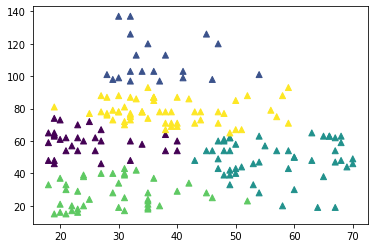

In [ ]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, marker='^')

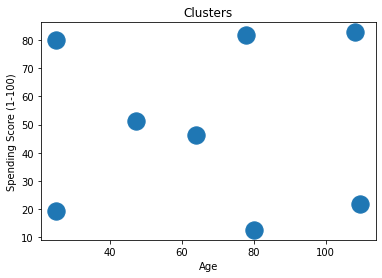

In [ ]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
from sklearn import metrics
metrics.silhouette_score(X, kmeans.labels_)

0.40157587536205724

In [ ]:
kmeans = KMeans(n_clusters=8, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(x)
print(kmeans.inertia_)

25018.576334776335


## Aglomerative Heirarchical Clustering

Data Pre-Processing

In [ ]:
x = df2.iloc[:, [3, 4]].values  

Finding the optimal number of clusters using the Dendrogram

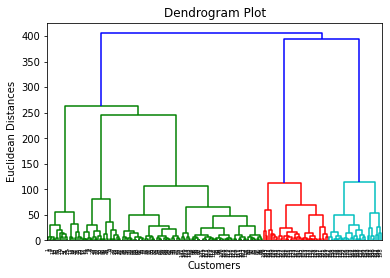

In [ ]:
#Finding the optimal number of clusters using the dendrogram  
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(x, method="ward"))
plt.title("Dendrogram Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Customers")  
plt.show()

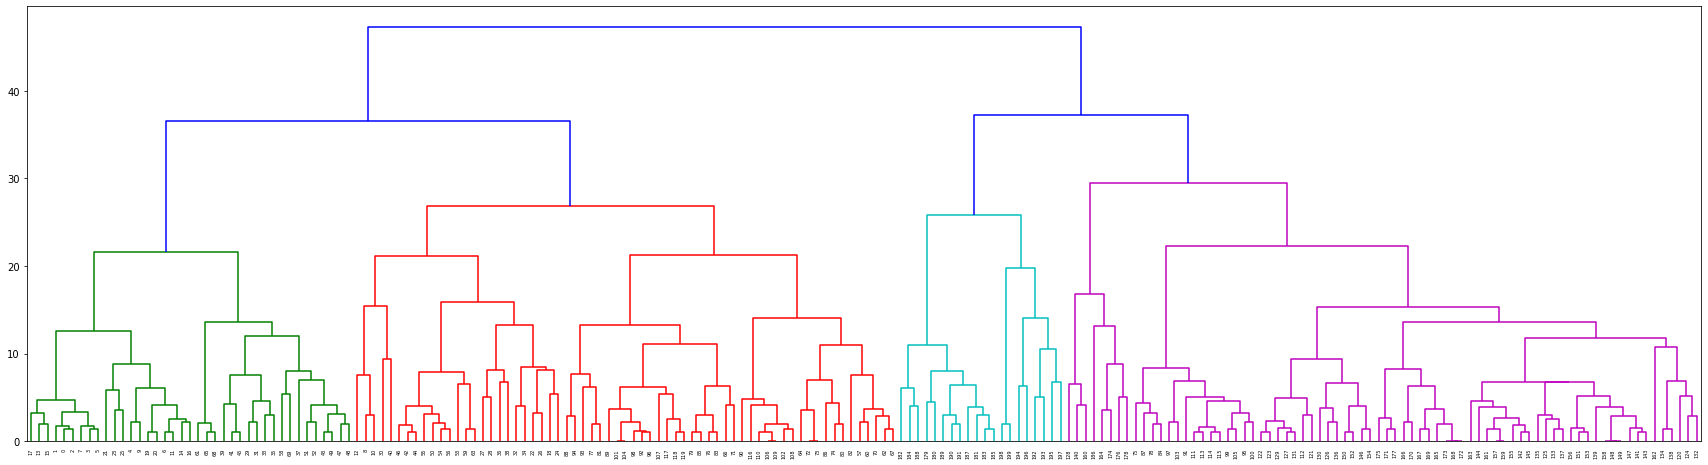

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(30,8))
dendrogram = sch.dendrogram(sch.linkage(X, method='average'))

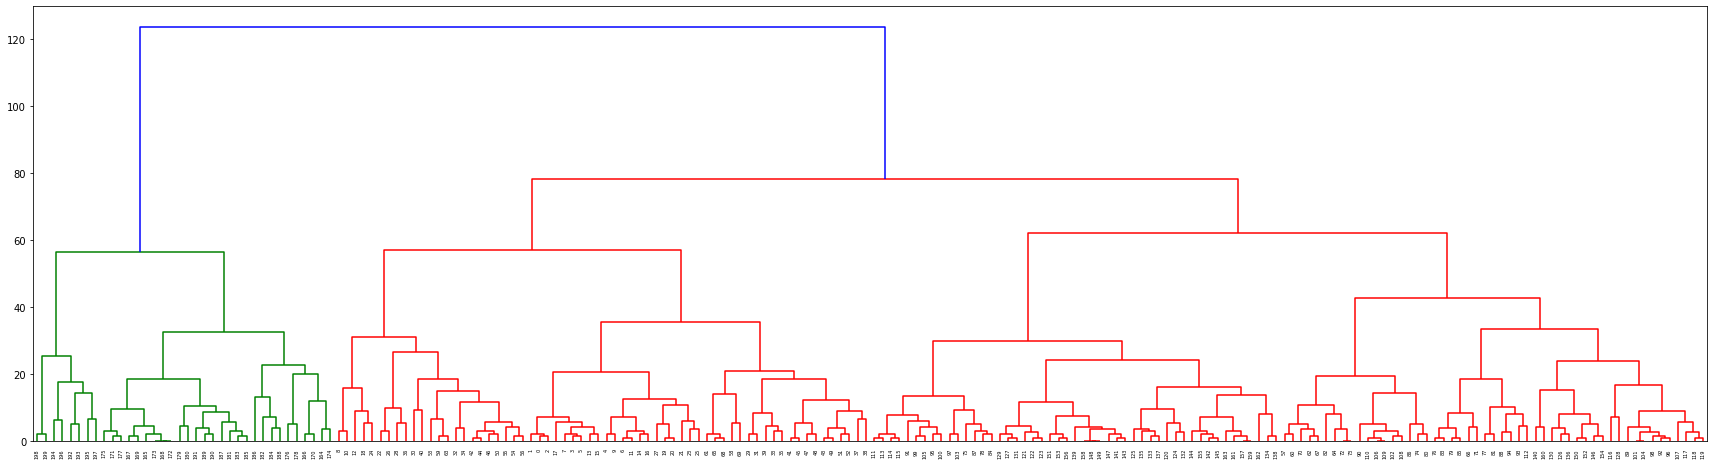

In [ ]:
plt.figure(figsize=(30,8))
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))

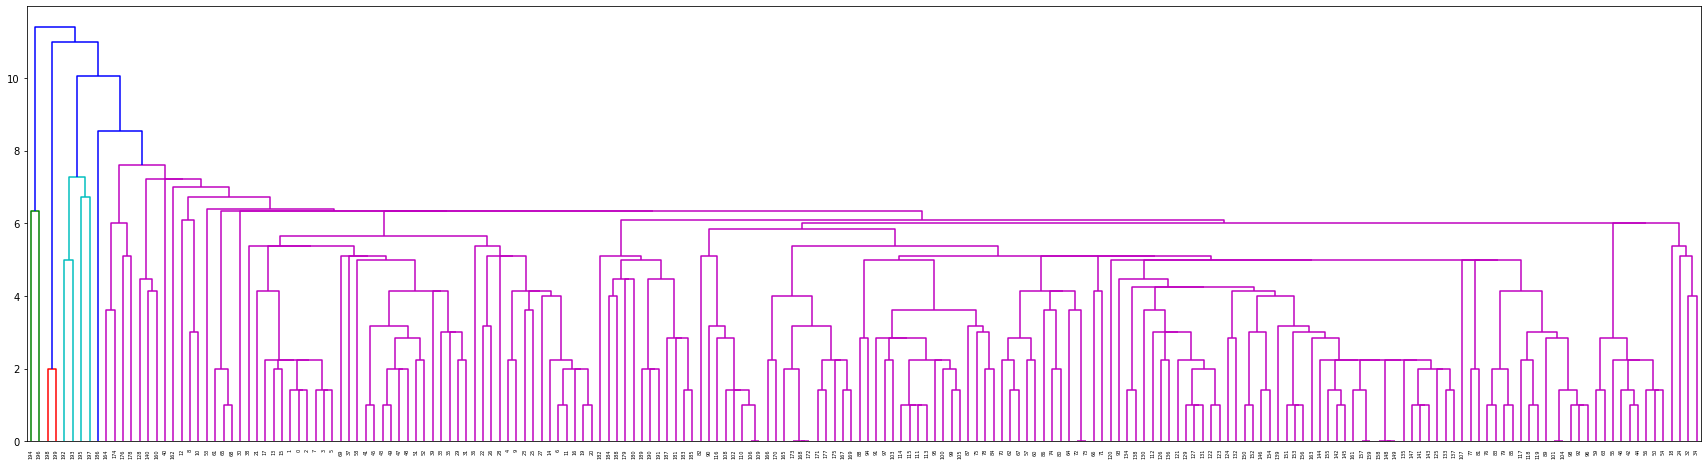

In [ ]:
plt.figure(figsize=(30,8))
dendrogram = sch.dendrogram(sch.linkage(X, method='single'))

## DB SCAN

First check for the optimal number of clusters

[-1  0  1  2  3  4  5  6  7  8  9]


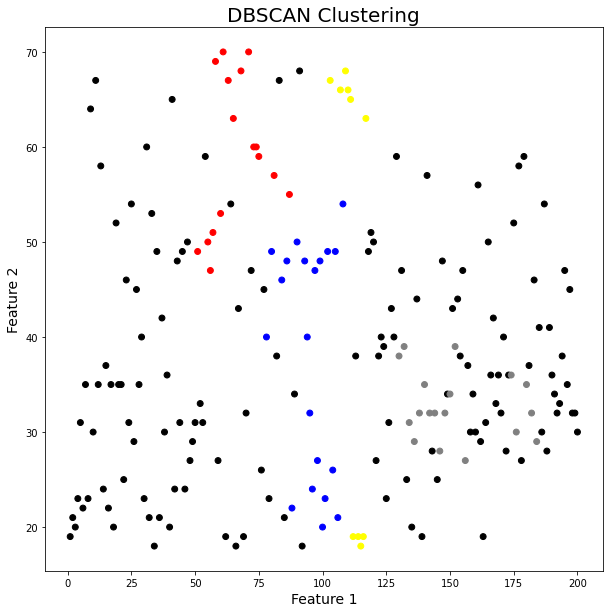

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib

# fit the model
dbs = DBSCAN(eps = 10, min_samples = 5)
data_clean = df2.drop('Genre', axis=1) 
dbs.fit(data_clean)
print(np.unique(dbs.labels_))
colors=['black','red','blue','yellow', 'gray']

# plotting predicted
plt.figure(figsize=(10,10))
plt.scatter(data_clean.iloc[:,0],data_clean.iloc[:,1], c=dbs.labels_, cmap=matplotlib.colors.ListedColormap(colors), s=35)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

from sklearn.cluster import DBSCAN
db = DBSCAN(eps=10, min_samples=7).fit(X)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X[:,0], X[:,1], c=db.labels_, cmap='rainbow')
ax.set_title("DBSCAN Clustering")
ax.set_xlabel("X0")
ax.set_ylabel("X1")
plt.colorbar(scatter)
plt.show()

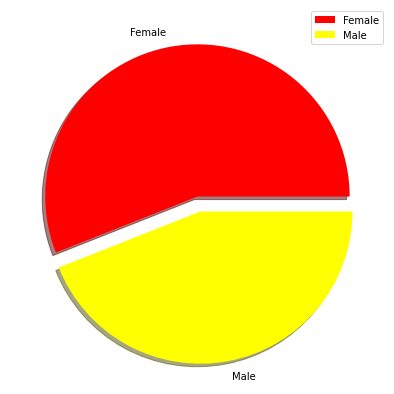

In [ ]:
plt.figure(figsize=(7,7))
size = df2['Genre'].value_counts()
label = ['Female','Male']
color = ['Red','Yellow']
explode = [0,0.1]
plt.pie(size,explode=explode,labels=label,colors=color,shadow=True)
plt.legend()
plt.show()

Text(0, 0.5, 'Spending score')

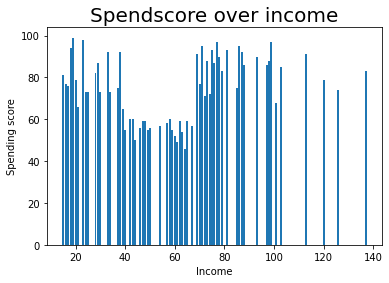

In [ ]:
plt.bar(df2['Annual Income (k$)'],df2['Spending Score (1-100)'])
plt.title('Spendscore over income',fontsize=20)
plt.xlabel('Income')
plt.ylabel('Spending score')

In [ ]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=6,metric='euclidean')

In [ ]:
model = db.fit(x)
label = model.labels_
label

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1,
       -1, -1,  1, -1,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
       -1, -1, -1,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2,  2, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

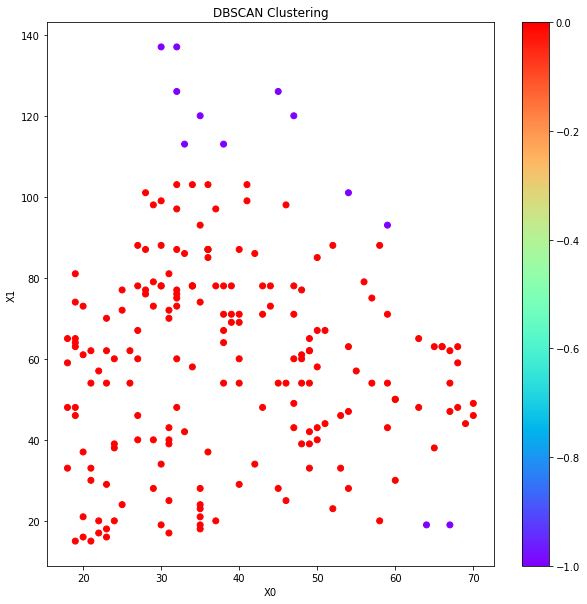

In [78]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=10, min_samples=7).fit(X)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X[:,0], X[:,1], c=db.labels_, cmap='rainbow')
ax.set_title("DBSCAN Clustering")
ax.set_xlabel("X0")
ax.set_ylabel("X1")
plt.colorbar(scatter)
plt.show()